# Project forecasting

## Imports

In [1]:
# utils
from utils.market_share import *

from typing import Dict, List, Any
import pickle
from tqdm import tqdm 


Sample segments: {'female_44_less': np.int64(1631), 'female_45_more': np.int64(1034), 'male_44_less': np.int64(1451), 'male_45_more': np.int64(884)}
Sample size: 5000
Weights: {'female_44_less': np.float64(1.005031010413465), 'female_45_more': np.float64(0.8480333014252863), 'male_44_less': np.float64(1.1635155138048476), 'male_45_more': np.float64(0.9000757667545914)}
Sum of the weights: 5000.0


Informations about the data [here](https://transp-or.epfl.ch/documents/technicalReports/CS_LPMC.pdf).

## Functions

## Goal

1. Report the market shares predicted by Modelpref for each scenario.
Do they match your expectations? Compare those with the original market shares. [1 point]

## Scenario 1

An additional charge of £1.5 to the car users

## Scenario 2

A decrease of the public transport cost by 20%.

In [2]:
# create a dict best practice 
model_market_share: Dict[str, List] = {
    "Model 4" : [V_3, results_nested, biogeme_nested, True],
    "Model 4 scenario 1" : [V_scenario1, results_scenario1, biogeme_scenario1, True],
    "Model 4 scenario 2" : [V_scenario2, results_scenario2, biogeme_scenario2, True]
}
file_name = 'market_shares_forecasting.pickle'
try:
    with open(file_name, 'rb') as f:
        all_market_shares = pickle.load(f)
        print(f'Market shares read from {file_name}')
except FileNotFoundError:
    # If the file is not found, calculate the market shares for each model
    all_market_shares: Dict[str, Any] = {
        model: market_share(utilities, results, model_biogeme, is_nested) 
        for model, (utilities, results, model_biogeme, is_nested) in tqdm(model_market_share.items())
    }
    # Save the calculated market shares to the pickle file
    with open(file_name, 'wb') as f:
        pickle.dump(all_market_shares, f)
    print(f'Market shares calculated and saved in {file_name}')

  0%|          | 0/3 [00:00<?, ?it/s]

         Prob. walk  Prob. cycle     Prob. PT    Prob. car
count  5.000000e+03  5000.000000  5000.000000  5000.000000
mean   1.703815e-01     0.029206     0.358771     0.441642
std    2.261562e-01     0.013183     0.254056     0.222394
min    5.824013e-28     0.001408     0.005301     0.002324
25%    5.130373e-05     0.020531     0.155238     0.273868
50%    3.075383e-02     0.028423     0.283894     0.448525
75%    3.195024e-01     0.036441     0.497140     0.607193
max    8.393298e-01     0.079564     0.995172     0.974367


 33%|███▎      | 1/3 [01:12<02:25, 72.94s/it]

         Prob. walk  Prob. cycle     Prob. PT    Prob. car
count  5.000000e+03  5000.000000  5000.000000  5000.000000
mean   1.703885e-01     0.029203     0.358788     0.441621
std    2.261855e-01     0.013173     0.254124     0.222438
min    5.947356e-28     0.001435     0.005298     0.002339
25%    5.115338e-05     0.020537     0.155312     0.273502
50%    3.080365e-02     0.028398     0.283957     0.448358
75%    3.197033e-01     0.036408     0.497293     0.607263
max    8.389883e-01     0.079490     0.995126     0.974349


 67%|██████▋   | 2/3 [02:24<01:12, 72.10s/it]

         Prob. walk  Prob. cycle     Prob. PT    Prob. car
count  5.000000e+03  5000.000000  5000.000000  5000.000000
mean   1.703885e-01     0.029203     0.358788     0.441621
std    2.261855e-01     0.013173     0.254124     0.222438
min    5.947356e-28     0.001435     0.005298     0.002339
25%    5.115338e-05     0.020537     0.155312     0.273502
50%    3.080365e-02     0.028398     0.283957     0.448358
75%    3.197033e-01     0.036408     0.497293     0.607263
max    8.389883e-01     0.079490     0.995126     0.974349


100%|██████████| 3/3 [03:36<00:00, 72.18s/it]

Market shares calculated and saved in market_shares_forecasting.pickle


In [3]:
print(all_market_shares.keys())

dict_keys(['Model 4', 'Model 4 scenario 1', 'Model 4 scenario 2'])


In [4]:
print(all_market_shares["Model 4"])
print(all_market_shares["Model 4 scenario 1"])
print(all_market_shares["Model 4 scenario 2"])

{'Walking': IndicatorTuple(value=np.float64(0.16923833328461266), lower=np.float64(0.14618407551079435), upper=np.float64(0.18993254328687548)), 'Cycling': IndicatorTuple(value=np.float64(0.029198246016707174), lower=np.float64(0.01938111650224318), upper=np.float64(0.036798647884725005)), 'Public transportation': IndicatorTuple(value=np.float64(0.36194918032624634), lower=np.float64(0.3068775749698955), upper=np.float64(0.48577635571145694)), 'Car': IndicatorTuple(value=np.float64(0.43961424037243385), lower=np.float64(0.2948880614221003), upper=np.float64(0.4944855816065458))}
{'Walking': IndicatorTuple(value=np.float64(0.16924385352194174), lower=np.float64(0.14133476904194), upper=np.float64(0.18569621281094337)), 'Cycling': IndicatorTuple(value=np.float64(0.029195160761040746), lower=np.float64(0.01872374668409441), upper=np.float64(0.035566927766007)), 'Public transportation': IndicatorTuple(value=np.float64(0.3619678076670275), lower=np.float64(0.3172744738759581), upper=np.floa

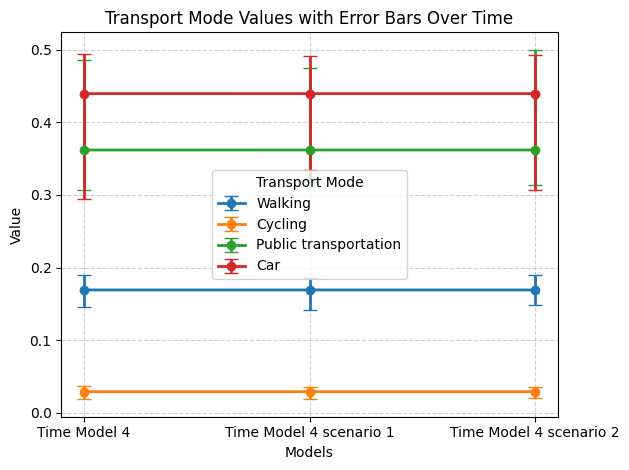

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Raw data 
data_points = [
    {'Walking': {'value': 0.16923833328461266, 'lower': 0.14618407551079435, 'upper': 0.18993254328687548}, 
     'Cycling': {'value': 0.029198246016707174, 'lower': 0.01938111650224318, 'upper': 0.036798647884725005}, 
     'Public transportation': {'value': 0.36194918032624634, 'lower': 0.3068775749698955, 'upper': 0.48577635571145694}, 
     'Car': {'value': 0.43961424037243385, 'lower': 0.2948880614221003, 'upper': 0.4944855816065458}
    },
    {'Walking': {'value': 0.16924385352194174, 'lower': 0.14133476904194, 'upper': 0.18569621281094337}, 
     'Cycling': {'value': 0.029195160761040746, 'lower': 0.01872374668409441, 'upper': 0.035566927766007}, 
     'Public transportation': {'value': 0.3619678076670275, 'lower': 0.3172744738759581, 'upper': 0.47425036043959}, 
     'Car': {'value': 0.43959317804999, 'lower': 0.33504642371642585, 'upper': 0.4911399374579376}
    },
    {'Walking': {'value': 0.16924385352194174, 'lower': 0.14787075091378843, 'upper': 0.18932766839910098}, 
     'Cycling': {'value': 0.029195160761040746, 'lower': 0.01999728462902235, 'upper': 0.036161269312406256}, 
     'Public transportation': {'value': 0.3619678076670275, 'lower': 0.31361508716891756, 'upper': 0.49993555826282754}, 
     'Car': {'value': 0.43959317804999, 'lower': 0.30649555301542253, 'upper': 0.492263045407451}
    }
]

# Extract transport modes
transport_modes = list(data_points[0].keys())

# Prepare data for plotting
times = ["Model 4", "Model 4 scenario 1", "Model 4 scenario 2"]  # Time points (arbitrary identifiers for each dataset)

# Loop through each transport mode and plot the values with error bars
for mode in transport_modes:
    values = [dp[mode]['value'] for dp in data_points]
    lower_bounds = [dp[mode]['lower'] for dp in data_points]
    upper_bounds = [dp[mode]['upper'] for dp in data_points]
    
    # Calculate the error margins
    lower_errors = [value - lower for value, lower in zip(values, lower_bounds)]
    upper_errors = [upper - value for value, upper in zip(values, upper_bounds)]
    
    # Plot the error bars
    plt.errorbar(times, values, yerr=[lower_errors, upper_errors], label=mode, capsize=5, marker='o', linestyle='-', linewidth=2)

# Customize plot
plt.xlabel('Models')
plt.ylabel('Value')
plt.title('Transport Mode Values with Error Bars Over Time')
plt.xticks(times, labels=[f'Time {i}' for i in times])
plt.legend(title="Transport Mode")
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()
